In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/Clustering


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/Clustering


In [ ]:
%ls

customer-seg.csv


In [ ]:
import pandas as pd

# Load the dataset
customer_data = pd.read_csv("customer-seg.csv")

# Display the first few rows of the dataset to understand its structure
customer_data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


To perform clustering, we'll consider the numerical and categorical attributes relevant to customer segmentation. These include sex, marital status, age, education, income, occupation, and settlement size. The ID column will be excluded as it is just an identifier.

I will use the K-means clustering algorithm, which is commonly used for segmentation. Before applying K-means, it's important to scale the data to ensure that each feature contributes equally to the distance calculations. Let's proceed with data preprocessing and clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

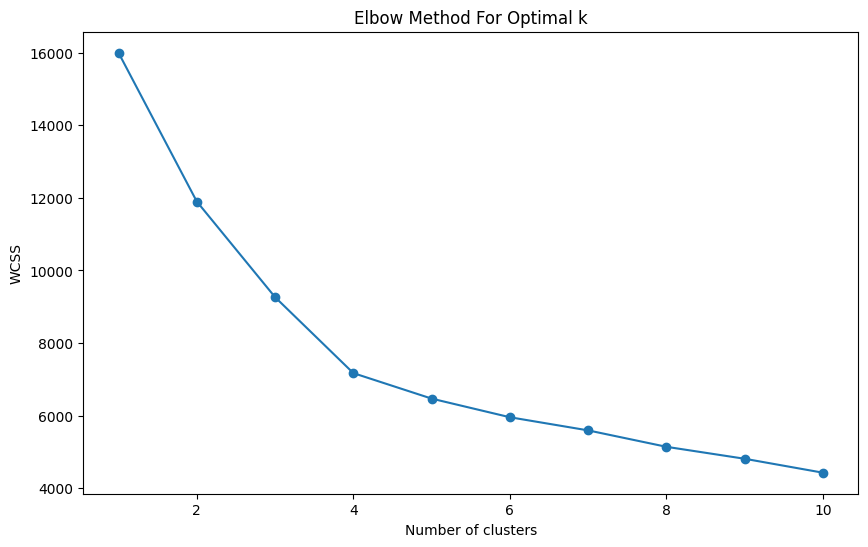

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Removing the 'ID' column as it is not relevant for clustering
data_clustering = customer_data.drop('ID', axis=1)

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The Elbow Method plot shows the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters. The "elbow" point in the plot represents an optimal balance between the number of clusters and the total variance within the clusters. This is the point beyond which adding more clusters doesn't provide much better modeling of the data.

From the plot, it appears that the elbow point is around 3 or 4 clusters. Choosing the exact number of clusters can sometimes be subjective, but based on this plot, I'll proceed with 4 clusters for the segmentation.

In [ ]:
# Applying K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Adding the cluster information to the original data
customer_data['Cluster'] = clusters

# Viewing the first few rows with cluster information
customer_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,100000001,0,0,67,2,124670,1,2,0
1,100000002,1,1,22,1,150773,1,2,1
2,100000003,0,0,49,1,89210,0,0,3
3,100000004,0,0,45,1,171565,1,1,2
4,100000005,0,0,53,1,149031,1,1,2


The K-means clustering algorithm has been applied to the dataset, and each customer has been assigned to one of four clusters. To understand the characteristics of each cluster, we can examine the mean values of the features within each cluster.

In [ ]:
# Calculating the mean values of features for each cluster
cluster_means = customer_data.groupby('Cluster').mean()
cluster_means

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,,
0,1.000009e+08,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,1.000011e+08,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
2,1.000007e+08,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,1.000013e+08,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290


    Cluster 0:
        Average Age: Approximately 56 years.
        Education Level: Relatively high (average of 2.13).
        Income: High (average of 158,338).
        Occupation: Predominantly in the higher occupation category.
        Settlement Size: Tends to be in larger settlements.
        Sex and Marital Status: Mixed, with a slight majority being married.

    Cluster 1:
        Average Age: Approximately 36 years.
        Education Level: Lower (average of 0.75).
        Income: Lower (average of 97,860).
        Occupation: Lower occupation category.
        Settlement Size: Primarily in smaller settlements.
        Sex and Marital Status: Predominantly male and single.

    Cluster 2:
        Average Age: Approximately 29 years.
        Education Level: Moderate (average of 1.07).
        Income: Moderate (average of 105,759).
        Occupation: Mostly mid-level occupations.
        Settlement Size: Mostly in medium-sized settlements.
        Sex and Marital Status: Predominantly female and almost all are married.

    Cluster 3:
        Average Age: Approximately 36 years.
        Education Level: Lower (average of 0.73).
        Income: Higher (average of 141,218).
        Occupation: Predominantly in the higher occupation category.
        Settlement Size: Tends to be in larger settlements.
        Sex and Marital Status: Predominantly male and mostly single.

These clusters can be interpreted as representing different segments of customers, such as high-income older individuals, younger professionals, young married females, and so on. This segmentation can be very useful for tailored marketing strategies, product development, and customer service improvements.